<h1>T-test Mean Comparison with Normal Distribution</h1>

<h3>About</h3>
https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ttest_ind.html<br>
statsmodels.stats.weightstats.ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)

The alternative hypothesis, H1, has to be one of the following<br>
‘two-sided’ (default): H1: difference in means not equal to value<br>
‘larger’ : H1: difference in means larger than value<br>
‘smaller’ : H1: difference in means smaller than value<br><br>
usevarstr, ‘pooled’ or ‘unequal’<br>
If pooled, then the standard deviation of the samples is assumed to be the same. If unequal, then Welch ttest with <br> Satterthwait degrees of freedom is used<br><br>
value: difference between the means under the Null hypothesis.<br><br>
Returns:<br>
tstat float: test statistic<br>
pvalue float: pvalue of the t-test<br>
df int or float:degrees of freedom used in the t-test

In [242]:
import statsmodels 
from statsmodels.stats import weightstats as ws
import pandas as pd 
import random
import numpy as np
import scipy as sp
#import plotly.express as px
import matplotlib
from matplotlib import pyplot as plt

<h3>Functions</h3>

In [288]:
def ttest(column1, column2, alternative, usevar, weights, value, alpha):
    results = ws.ttest_ind(np.array(column1), np.array(column2), 
             alternative=alternative, usevar=usevar, 
             weights=weights, value=value)
    if alternative == 'two-sided' and results[1] < alpha/2:
        answer = 'Yes, Significant'
    elif alternative != 'two-sided' and results[1] < alpha:
        answer = 'Yes, Significant'
    else:
        answer = 'No, Not significant'
    return print('P-value:', results[1],'\nT-stat:', results[0],'\ndf:', results[2], '\nAnswer:',answer)

def normality(column):
    shap = sp.stats.shapiro(np.array(column))
    if shap.pvalue >= 0.05: #null = normal, if cannot reject then assume normal
        dist = 'Normal'
    else:
        dist = 'Not normal'
    return print(dist, 'P-value:', shap.pvalue)

def equalvariances(column1,column2):
    lev = sp.stats.levene(np.array(column1),np.array(column2))
    if lev.pvalue >= 0.05: #null = normal, if cannot reject then assume normal
        comparison = 'Equal'
    else:
        comparison = 'Not equal'
    return print(comparison, 'P-value:', lev.pvalue)

<h3>Sample Tables</h3>

                An           Bn
count  1000.000000  1000.000000
mean     49.091838    50.952249
std      16.335423    17.265957
min      -8.745188    -6.490880
25%      38.475424    39.148187
50%      49.390232    51.370180
75%      60.688176    62.620974
max      95.540552   107.378045


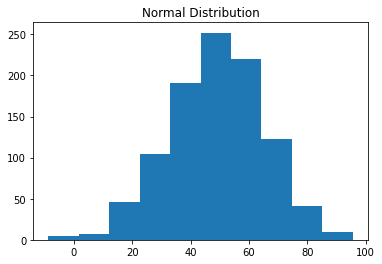

In [289]:
#normal 
mu, sigma = 50, 17 
colAn = np.random.normal(mu, sigma, 1000)
colBn = np.random.normal(mu, sigma, 1000)

unionedarrayn = np.column_stack((colAn,colBn))
dfn = pd.DataFrame(unionedarrayn) 
headersn = ['An','Bn']
dfn.columns= headersn
print(dfn.describe())

#plotly doesnt show on git
#fig = px.histogram(dfn, x='An', title='Normal Distribution')
#fig.show()

n, bins, patches = plt.hist(dfn['An'])
plt.title('Normal Distribution')
plt.show()

                 A            B
count  1000.000000  1000.000000
mean     51.949000    50.561000
std      29.032556    29.452771
min       1.000000     1.000000
25%      27.000000    24.000000
50%      51.000000    50.000000
75%      78.000000    76.000000
max     100.000000   100.000000


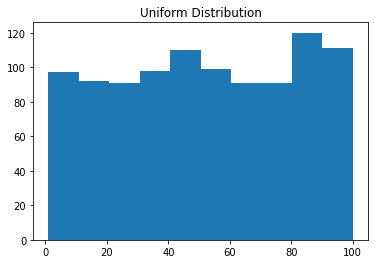

In [290]:
# uniform 
colA = []
colB = []
for i in range(0,1000):
    nA = random.randint(1,100)
    colA.append(nA)
    nB = random.randint(1,100)
    colB.append(nB)

unionedarray = np.column_stack((colA,colB))
df = pd.DataFrame(unionedarray) 
headers = ['A','B']
df.columns= headers
print(df.describe())

#plotly doesnt show on git
#fig = px.histogram(df, x='A', title='Uniform Distribution')
#fig.show()

n, bins, patches = plt.hist(df['A'])
plt.title('Uniform Distribution')
plt.show()

                Az           Bz
count  1000.000000  1000.000000
mean     31.391000    30.582000
std      31.766637    31.267698
min       1.000000     1.000000
25%       6.000000     5.000000
50%      10.500000    10.500000
75%      57.000000    57.000000
max     100.000000   100.000000


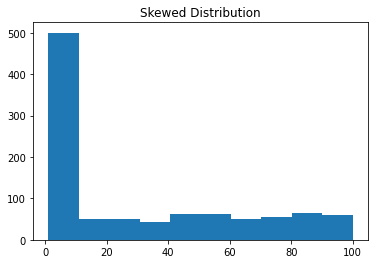

In [291]:
#neither
colAz = []
colBz = []
for i in range(0,500):
    nAz = random.randint(1,10)
    nAz2 = random.randint(11,100)
    colAz.append(nAz)
    colAz.append(nAz2)
    nBz = random.randint(1,10)
    nBz2 = random.randint(11,100)
    colBz.append(nBz)
    colBz.append(nBz2)

unionedarrayz = np.column_stack((colAz,colBz))
dfz = pd.DataFrame(unionedarrayz) 
headers = ['Az','Bz']
dfz.columns= headers
print(dfz.describe())

#plotly doesnt show on git
#fig = px.histogram(dfz, x='Az', title='Skewed Distribution')
#fig.show()

n, bins, patches = plt.hist(dfz['Az'])
plt.title('Skewed Distribution')
plt.show()

<h3>Output</h3>

<h5>Are Columns Normally Distributed? Check 1st Column in Dataframes</h5>

In [292]:
normality(dfn['An'])
normality(df['A'])
normality(dfz['Az'])

Normal P-value: 0.1930091679096222
Not normal P-value: 2.34410395908605e-17
Not normal P-value: 8.208974285902431e-32


<h5>Using 1st Sample Table, Are Variances the Same?</h5>

In [293]:
equalvariances(dfn['An'],dfn['Bn'])

Equal P-value: 0.11701709408949755


<h5>Using 1st Sample Table, Is A Greater than B?</h5>

In [296]:
ttest(dfn['An'], dfn['Bn'], 'larger', 'pooled', (None, None), 0, 0.05)

P-value: 0.9932996686401496 
T-stat: -2.4751435970603333 
df: 1998.0 
Answer: No, Not significant


<h5>Using 1st Sample Table, Is A Smaller than B?</h5>

In [299]:
ttest(dfn['An'], dfn['Bn'], 'smaller', 'pooled', (None, None), 0, 0.05)

P-value: 0.006700331359850312 
T-stat: -2.4751435970603333 
df: 1998.0 
Answer: Yes, Significant


<h5>Using 1st Sample Table, Is B Different to A (Unequal)?</h5>

In [300]:
ttest(dfn['An'], dfn['Bn'], 'two-sided', 'pooled', (None, None), 0, 0.05)

P-value: 0.013400662719700624 
T-stat: -2.4751435970603333 
df: 1998.0 
Answer: Yes, Significant
